In [153]:
#impoort
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [154]:
#load dataset
from sklearn.datasets import load_wine
wine = load_wine(as_frame=True)
df= wine.data
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [155]:
df.corr()['flavanoids'].sort_values(ascending=False)

#flavanoids and Total_phenols have good coorelation

,flavanoids
flavanoids,1.000000
total_phenols,0.864564
od280/od315_of_diluted_wines,0.787194
proanthocyanins,0.652692
hue,0.543479
proline,0.494193
alcohol,0.236815
magnesium,0.195784
ash,0.115077
color_intensity,-0.172379


In [156]:
#split the data for testing and training
x= df[['total_phenols']]
y=df['flavanoids']

x_train, x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=123)


In [157]:
x_train


,total_phenols
142,1.55
8,2.80
72,1.88
114,2.56
148,1.93
...,...
17,2.95
98,3.52
66,2.98
126,2.74


In [158]:
x_test

,total_phenols
138,1.62
60,2.05
137,1.79
77,1.72
90,1.60
159,2.60
41,2.45
136,1.38
166,1.70
93,2.45


In [159]:
y_test

,flavanoids
138,0.48
60,1.09
137,0.60
77,1.32
90,1.50
159,1.10
41,2.68
136,0.47
166,0.92
93,2.25


In [160]:
y_train

,flavanoids
142,0.52
8,2.98
72,1.84
114,2.29
148,0.76
...,...
17,3.40
98,3.75
66,3.18
126,3.15


In [161]:
#simple linear regression
simple_model= LinearRegression()
simple_model.fit(x_train,y_train)

LinearRegression()

In [162]:
#predication of simple regression
y_pred = simple_model.predict(x_test)

In [163]:
#evaluate the models
print('Simple Linear Regression Metrics:')
print(f'Mean Squarred Error: {mean_squared_error(y_test,y_pred):.2f}')
print(f'R^2 Score : {r2_score(y_test,y_pred):.2f}')

Simple Linear Regression Metrics:
Mean Squarred Error: 0.34
R^2 Score : 0.63


->  Here, Mean squared error represents the avg squared difference between actual and predicted value.
Higher the MSE, lower the chance of prediction to be near the actual values.
Hence,the MSE OF 0.32 means less error, so your predictions are much closer to the actual values.


->  The R^2 score measures how well your model explains the variance in the data. if score is 1 then it is perfect model and 0 means model explain nothing  so the score of 0.63 suggest the linear model can only explain 63%  of data and can capture meaningful patterns!


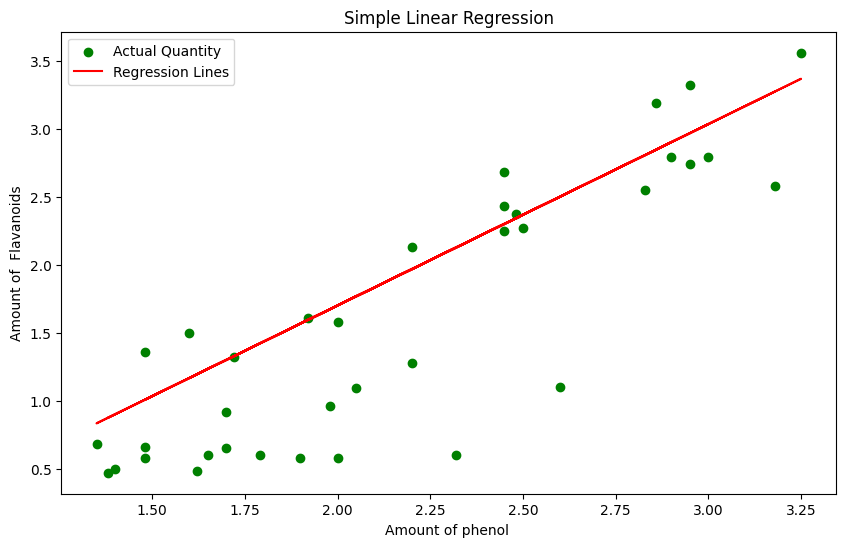

In [164]:
#plotting the regression line
plt.figure(figsize=(10,6))
plt.scatter(x_test,y_test,color='green',label='Actual Quantity')
plt.plot(x_test,y_pred,color='red',label='Regression Lines')
plt.xlabel('Amount of phenol ')
plt.ylabel('Amount of  Flavanoids')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

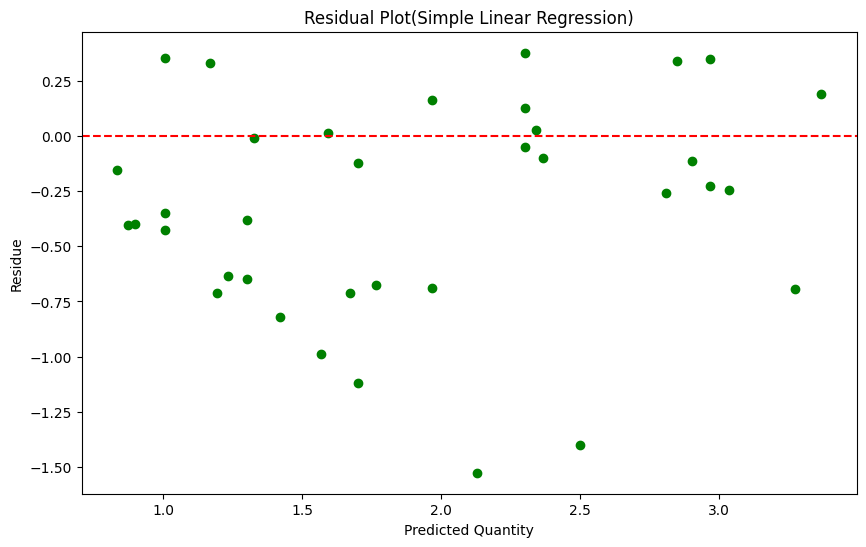

In [175]:
#Residual plot for Simple Linear Regression
plt.figure(figsize=(10,6))
plt.scatter(y_pred,y_test- y_pred,color='green')
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel('Predicted Quantity')
plt.ylabel('Residue')
plt.title('Residual Plot(Simple Linear Regression)')
plt.show()

In [166]:
#removing od280/od315_of_diluted_wines and adding diluted wines
df['diluted_wines']=df['od280/od315_of_diluted_wines']
df.drop('od280/od315_of_diluted_wines', axis=1, inplace=True)


#multiple linear regression
x_multi= df[['total_phenols','diluted_wines','proanthocyanins']]
x_train_multi,x_test_multi,y_train,y_test = train_test_split(x_multi,y,test_size=0.2,random_state=123)

In [167]:
multi_model= LinearRegression()
multi_model.fit(x_train_multi,y_train)

LinearRegression()

In [168]:
#predications for multiple regression
y_pred_multi= multi_model.predict(x_test_multi)

In [169]:
x_test_multi

,total_phenols,diluted_wines,proanthocyanins
138,1.62,1.82,0.88
60,2.05,1.67,0.41
137,1.79,1.69,1.10
77,1.72,2.52,0.95
90,1.60,2.27,1.64
159,2.60,1.78,2.29
41,2.45,3.00,1.48
136,1.38,1.27,0.80
166,1.70,1.56,1.46
93,2.45,3.30,1.99


In [170]:
#evaluate the models
print('Multi Linear Regression Metrics:')
print(f'Mean Squarred Error: {mean_squared_error(y_test,y_pred_multi):.2f}')
print(f'R^2 Score : {r2_score(y_test,y_pred_multi):.2f}')

Multi Linear Regression Metrics:
Mean Squarred Error: 0.20
R^2 Score : 0.78


-> Here, Mean squared error represents the avg squared difference between actual and predicted value. Higher the MSE, lower the chance of prediction to be near the actual values. Hence,the MSE OF 0.20 means less error, so your predictions are much closer to the actual values.

-> The R^2 score measures how well your model explains the variance in the data. if score is 1 then it is perfect model and 0 means model explain nothing so the score of 0.78 suggest the linear model can only explain 78% of data and can capture meaningful patterns!

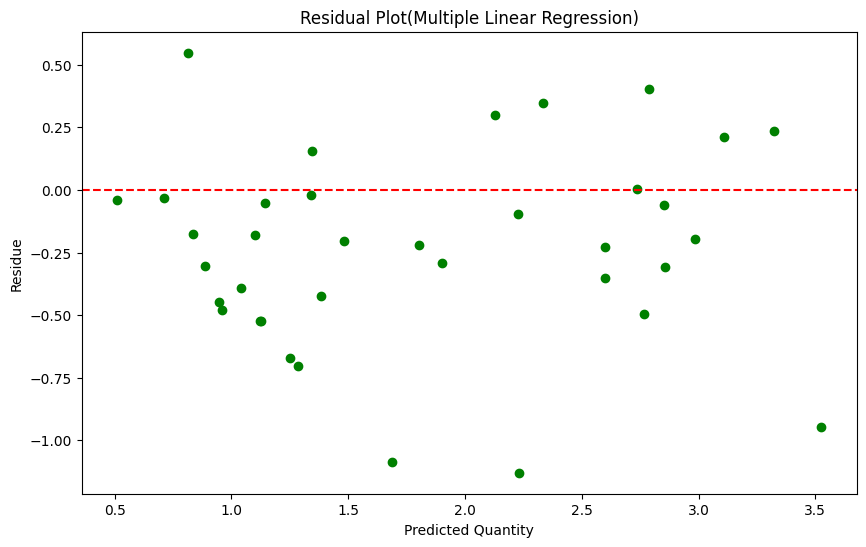

In [174]:
#Residual plot for multiple linear regression
plt.figure(figsize=(10,6))
plt.scatter(y_pred_multi,y_test- y_pred_multi,color='green')
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel('Predicted Quantity')
plt.ylabel('Residue')
plt.title('Residual Plot(Multiple Linear Regression)')
plt.show()
